# <center>CUSTOMER CHURN PREDICTION</center>

### Content
<br>Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

<b>The data set includes information about:</b>

Customers who left within the last month – the column is called Churn<br>
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br>
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
Demographic info about customers – gender, age range, and if they have partners and dependents
<hr><b>Inspiration</b><br>
To explore this type of models and learn more about the subject.

#### 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)

C:\Users\songaya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### 2. Load our data

In [2]:
data = pd.read_csv('customer_churn_prediction.csv')

#### 3.Data exploration

Peek first 5 records in our data

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Get number of records and feature

In [4]:
print("We have ",data.shape[0]," records and ",data.shape[1]," features ")

We have  7043  records and  21  features 


Group by Churn

In [5]:
data.groupby(['Churn'])['Churn'].count()

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
# pct of attrition // (Yes/Total)*100 
len(data[data['Churn']=='Yes'])/data.shape[0] * 100

26.536987079369588

Text(0.5,1,'Attrition')

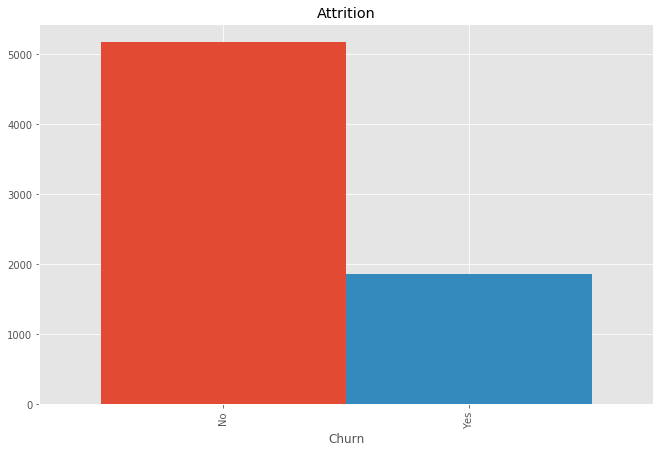

In [7]:
data.groupby(['Churn'])['Churn'].count().plot.bar(width=1,figsize=(11, 7)).set_title("Attrition")

Group by Gender

In [8]:
data.groupby(['gender','Churn'])['Churn'].count()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Gender')

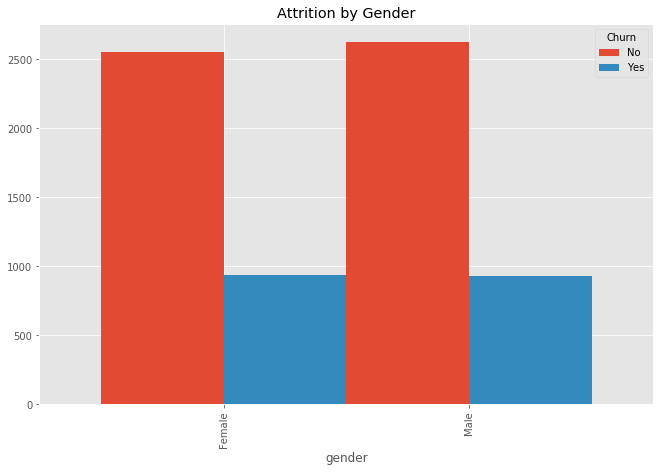

In [9]:
data.groupby(['gender','Churn'])['Churn'].count().unstack().plot.bar(width=1,figsize=(11, 7)).set_title("Attrition by Gender")

Group by Partner

In [10]:
data.groupby(['Partner','Churn'])['Churn'].count()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Partner')

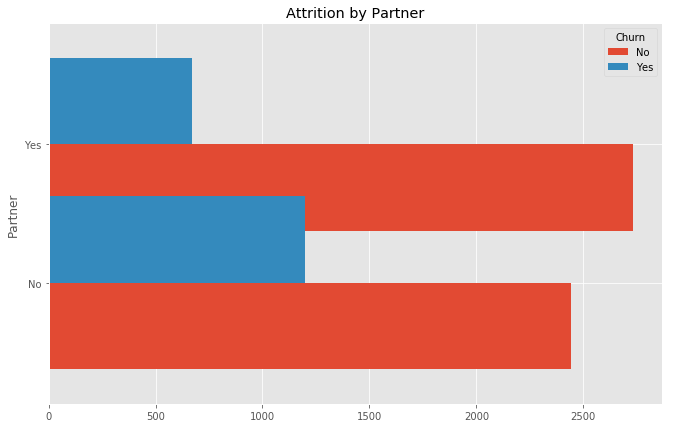

In [11]:
data.groupby(['Partner','Churn'])['Churn'].count().unstack().plot.barh(width=1.25,figsize=(11, 7)).set_title("Attrition by Partner")

Group by Contract

In [12]:
data.groupby(['Contract','Churn'])['Churn'].count()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Contract Type')

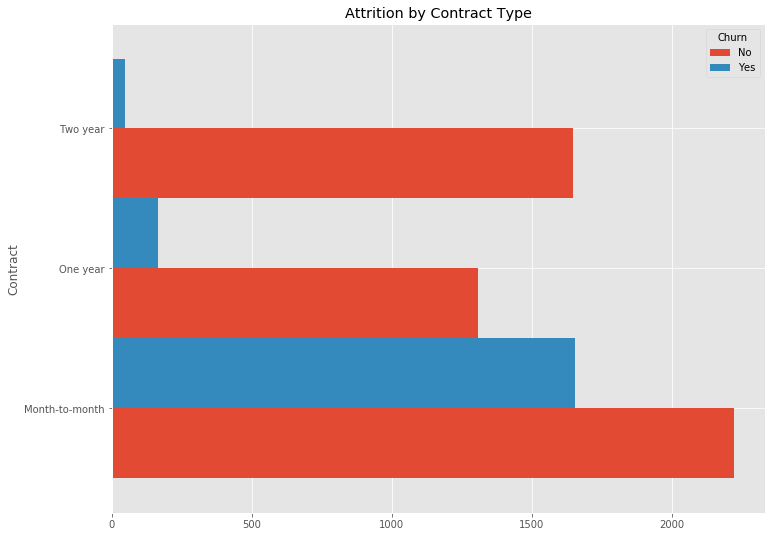

In [13]:
data.groupby(['Contract','Churn'])['Churn'].count().unstack().plot.barh(width=1,figsize=(11.7, 9)).set_title("Attrition by Contract Type")

Group by PhoneService

In [14]:
data.groupby(['PhoneService','Churn'])['Churn'].count()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Phone Service')

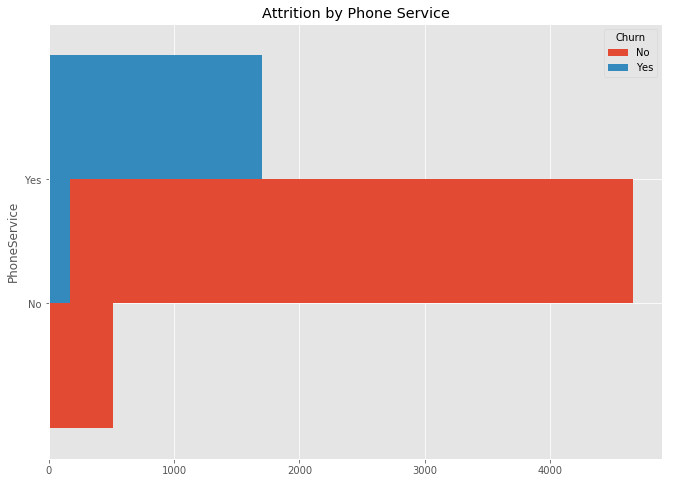

In [15]:
data.groupby(['PhoneService','Churn'])['Churn'].count().unstack().plot.barh(width=2,figsize=(11, 8)).set_title("Attrition by Phone Service")

Group by TechSupport

In [16]:
data.groupby(['TechSupport','Churn'])['Churn'].count()

TechSupport          Churn
No                   No       2027
                     Yes      1446
No internet service  No       1413
                     Yes       113
Yes                  No       1734
                     Yes       310
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Technical Support')

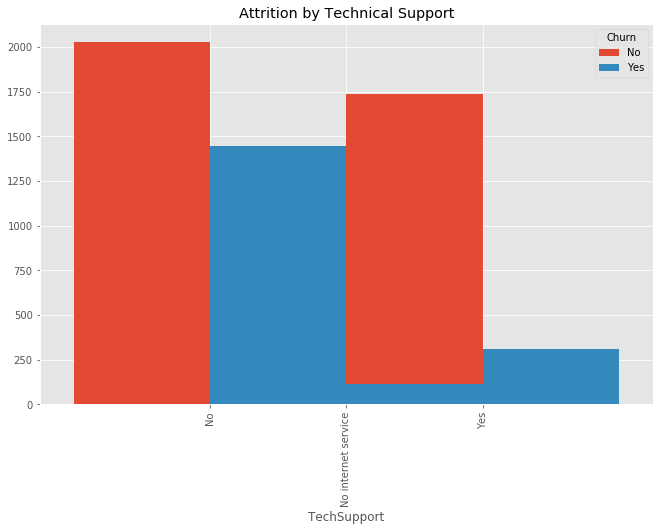

In [17]:
data.groupby(['TechSupport','Churn'])['Churn'].count().unstack().plot.bar(width=2,figsize=(11, 7)).set_title("Attrition by Technical Support")

Group by SeniorCitizen

In [18]:
data.groupby(['SeniorCitizen','Churn'])['Churn'].count()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

Text(0.5,1,'Attrition by Citizenship')

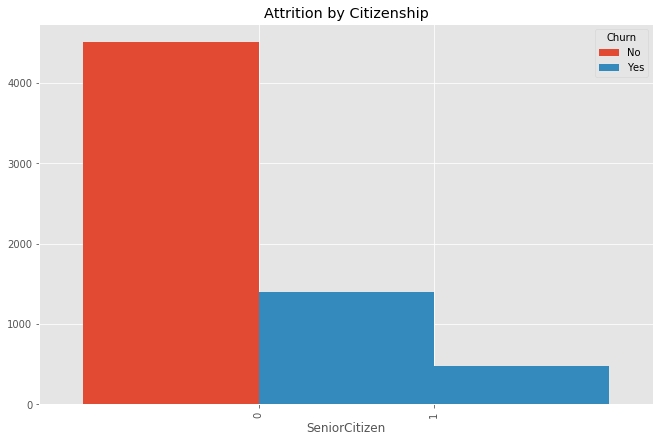

In [19]:
data.groupby(['SeniorCitizen','Churn'])['Churn'].count().unstack().plot.bar(width=2,figsize=(11, 7)).set_title("Attrition by Citizenship")

#### 4. Data Preprocessing

Dummy encode categorical features

In [20]:
data=pd.get_dummies(data,columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod'])

In [21]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.5,No,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


View columns

In [22]:
data.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
      

Check data types

In [23]:
data.dtypes

customerID                                  object
SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                       object
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Let's convert TotalCharges from object to numeric data type

In [24]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'].astype(str), errors='coerce')

Check for Missing data features

In [25]:
data.isna().sum()

customerID                                  0
SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service

Fill missing value for TotalCharges feature with mean

In [26]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

Check missing value again to see the changes

In [27]:
data.isna().sum()

customerID                                 0
SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

### 5. Get Features and target/label

In [28]:
features=data[['SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

target=data['Churn']

Scaling our features

In [29]:
features=MinMaxScaler().fit_transform(features)
target=np_utils.to_categorical(target.factorize()[0])

#### 6. Splitting our data into training and testing set

In [30]:
X_train, X_test, y_train, y_test=train_test_split(features,target, test_size=0.3,random_state=7)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 45), (2113, 45), (4930, 2), (2113, 2))

#### 7. Create our Machine Learning Model

In [32]:
model=Sequential()
model.add(Dense(units=8,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=len(data['Churn'].unique()), activation='softmax'))

In [33]:
# Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 368       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
Total params: 420
Trainable params: 420
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Fit model
history=model.fit(X_train,y_train, batch_size=64, epochs=100,validation_split=0.3)

Train on 3451 samples, validate on 1479 samples
Epoch 1/100
3451/3451 [==============================] - 2s 556us/step - loss: 0.6911 - acc: 0.6627 - val_loss: 0.6711 - val_acc: 0.7336
Epoch 2/100
3451/3451 [==============================] - 0s 123us/step - loss: 0.6605 - acc: 0.7386 - val_loss: 0.6510 - val_acc: 0.7390
Epoch 3/100
3451/3451 [==============================] - 0s 127us/step - loss: 0.6422 - acc: 0.7409 - val_loss: 0.6343 - val_acc: 0.7390
Epoch 4/100
3451/3451 [==============================] - 0s 121us/step - loss: 0.6271 - acc: 0.7407 - val_loss: 0.6211 - val_acc: 0.7390
Epoch 5/100
3451/3451 [==============================] - 0s 107us/step - loss: 0.6149 - acc: 0.7404 - val_loss: 0.6102 - val_acc: 0.7397
Epoch 6/100
3451/3451 [==============================] - 0s 97us/step - loss: 0.6046 - acc: 0.7421 - val_loss: 0.6006 - val_acc: 0.7404
Epoch 7/100
3451/3451 [==============================] - 0s 82us/step - loss: 0.5949 - acc: 0.7438 - val_loss: 0.5849 - val_acc: 0.

3451/3451 [==============================] - 0s 100us/step - loss: 0.4096 - acc: 0.8169 - val_loss: 0.4281 - val_acc: 0.7958
Epoch 61/100
3451/3451 [==============================] - 0s 107us/step - loss: 0.4094 - acc: 0.8157 - val_loss: 0.4291 - val_acc: 0.7972
Epoch 62/100
3451/3451 [==============================] - 0s 85us/step - loss: 0.4091 - acc: 0.8183 - val_loss: 0.4306 - val_acc: 0.7999
Epoch 63/100
3451/3451 [==============================] - 0s 108us/step - loss: 0.4088 - acc: 0.8140 - val_loss: 0.4313 - val_acc: 0.7978
Epoch 64/100
3451/3451 [==============================] - 0s 83us/step - loss: 0.4082 - acc: 0.8166 - val_loss: 0.4280 - val_acc: 0.7999
Epoch 65/100
3451/3451 [==============================] - 0s 87us/step - loss: 0.4065 - acc: 0.8157 - val_loss: 0.4283 - val_acc: 0.7972
Epoch 66/100
3451/3451 [==============================] - 0s 109us/step - loss: 0.4055 - acc: 0.8154 - val_loss: 0.4311 - val_acc: 0.7985
Epoch 67/100
3451/3451 [==========================

#### 8. Evaluate our model

In [35]:
print("Accuracy : ",model.evaluate(X_test,y_test)[1])

2113/2113 [==============================] - 0s 66us/step
Accuracy :  0.7893989588263133


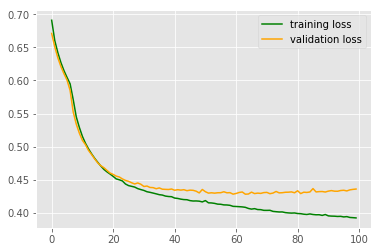

In [36]:
plt.plot(history.history['loss'],color='green',label='training loss')
plt.plot(history.history['val_loss'],color='orange',label='validation loss')
plt.legend(loc='upper right')
plt.show()

In [37]:
prediction=model.predict(X_test)
prediction[0:10]

array([[0.875132  , 0.12486795],
       [0.5448891 , 0.45511094],
       [0.5140369 , 0.48596314],
       [0.6085441 , 0.3914559 ],
       [0.71490633, 0.28509364],
       [0.82114863, 0.17885143],
       [0.3704673 , 0.62953275],
       [0.30529088, 0.69470906],
       [0.8774372 , 0.12256291],
       [0.5121008 , 0.48789915]], dtype=float32)

### 9. Observations
1. Approximately 36.12% of customers are prone to churning
2. Gender does not influence the rate of attrition. 
3. Customers who are not partners are more likely to churn leave than those who are partners.
4. Customers with short-term contract like (Month-to-Month) are more likely to churn that those with long-tern contract.
5. Clients without customer service support are 5 times more likely to leave the service than those that have tech support service.
6. Senior citizens are 3 times less likely to churn the service than other citizens.


### 10. Recommendations on Handling the customer churn problem
1. Improve the quality of service.
2. Strive to convert customers who are not partners to become partners.
3. Focus on making your customers have a long-term contract.
4. Provide support to all customers.
5. Engage with the customers likely to churn. Look at their profile, identify characteristics and analyse past interactions 
with your product and then simply talk to them. Ask for feedback, communicate latest developments that might be from interest or educate them on new product features. Approach customers likely to churn, but make sure that you come up with relevant things that may fit their individual needs. It will create a feeling of being understood and bind them to you and your business.

### 11. Model Improvement
To improve our model below are important tips;
1. Collect more information / features that describe user behaviour.
2. Perform hyperparameter tunning.
3. Use advanced algorithms such as neural network.